<div style="border-radius:10px;
            border : black solid;
            background-color: black;
            font-size:100%;
            text-align: left">
<h2 style='; border:0; border-radius: 15px; font-weight: bold; font-size:220%; color:cyan'><center> ⚕️🩺💉🧬 Diabetes 🧬💉🩺⚕️  </center></h2> 




<img src ='https://insights.omnia-health.com/sites/omnia-health.com/files/styles/article_featured_retina/public/diabetes_3.jpg?itok=v8xBPZYG' >



- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: indicates the function which scores likelihood of diabetes based on family history.
- Age: Age (years)
- Outcome: Class variable (0 or 1) 0: 

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Necessary Sklean Libraries**

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Loading and Reading Dataset**

In [3]:
dataset = '/kaggle/input/diabetes-data-set/diabetes.csv'
df = pd.read_csv(dataset)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
def value_count(df,col):
     return  df[col].nunique()
    
for col in df.columns:
    print(col, value_count(df,col))
    print()

Pregnancies 17

Glucose 136

BloodPressure 47

SkinThickness 51

Insulin 186

BMI 248

DiabetesPedigreeFunction 517

Age 52

Outcome 2



# **Descriptive Statistics**

In [6]:
df.describe().round(2).T

count    mean     std    min    25%     50%     75%  \
Pregnancies               768.0    3.85    3.37   0.00   1.00    3.00    6.00   
Glucose                   768.0  120.89   31.97   0.00  99.00  117.00  140.25   
BloodPressure             768.0   69.11   19.36   0.00  62.00   72.00   80.00   
SkinThickness             768.0   20.54   15.95   0.00   0.00   23.00   32.00   
Insulin                   768.0   79.80  115.24   0.00   0.00   30.50  127.25   
BMI                       768.0   31.99    7.88   0.00  27.30   32.00   36.60   
DiabetesPedigreeFunction  768.0    0.47    0.33   0.08   0.24    0.37    0.63   
Age                       768.0   33.24   11.76  21.00  24.00   29.00   41.00   
Outcome                   768.0    0.35    0.48   0.00   0.00    0.00    1.00   

                             max  
Pregnancies                17.00  
Glucose                   199.00  
BloodPressure             122.00  
SkinThickness              99.00  
Insulin                   846.00  
BMI                        67.10  
DiabetesPedigreeFunction    2.42  
Age                        81.00  
Outcome                     1.00

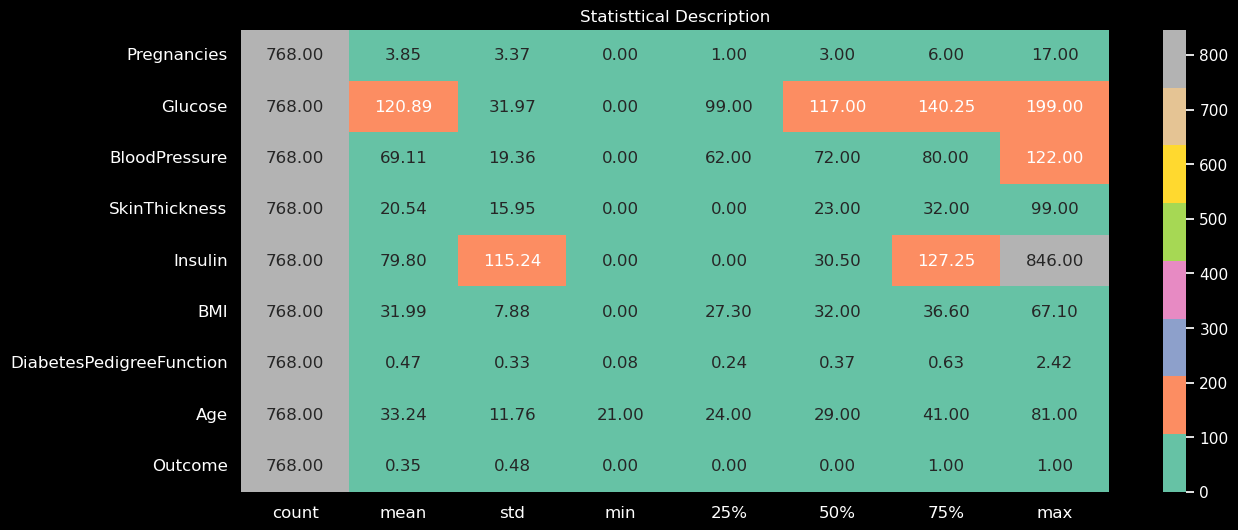

In [7]:

def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    plt.style.use('dark_background')
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statisttical Description')
    plt.show()

descriptive_stats(df)

# **Checking and Removing Duplicates**

In [8]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

'No duplicate entries'

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
dtype: int64


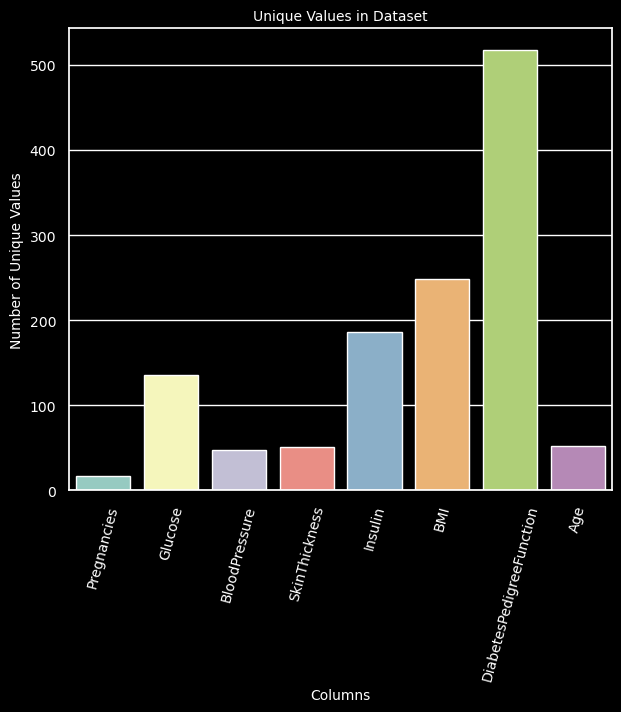

In [9]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique()
    print(unique_counts)
# Create a bar plot or count plot of unique values
    plt.style.use('dark_background')
    plt.figure(figsize=(7, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values, )

    plt.xticks(rotation=75, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df.iloc[:,0:-1])

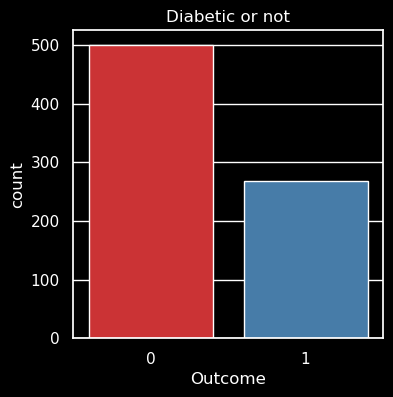

In [10]:
plt.style.use('dark_background')
plt.figure(figsize = (4,4))
ax = sns.countplot(x= df.Outcome , data= df, palette ='Set1')
ax.set_title('Diabetic or not')
plt.show()

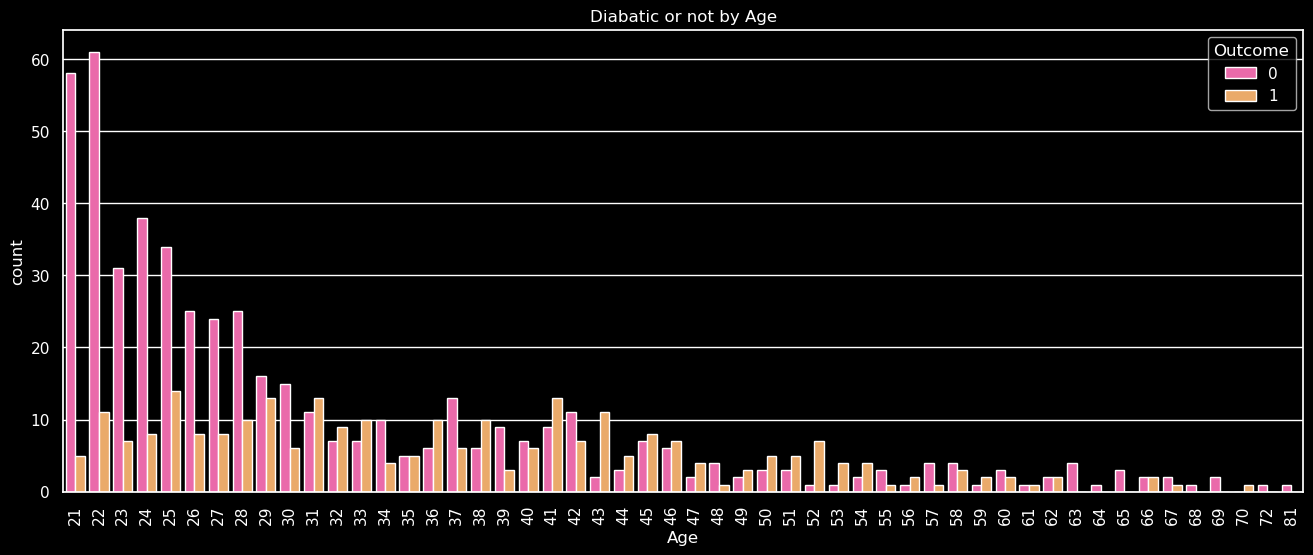

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.xticks(rotation = 90)
ax = sns.countplot(x= df['Age'] , hue= df['Outcome'], palette ='spring')
ax.set_title('Diabatic or not by Age')
plt.show()

In [12]:
num_not_cat = df.select_dtypes(exclude='object')


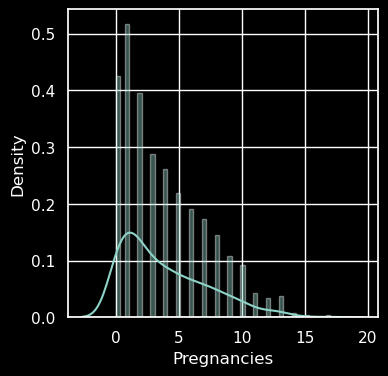

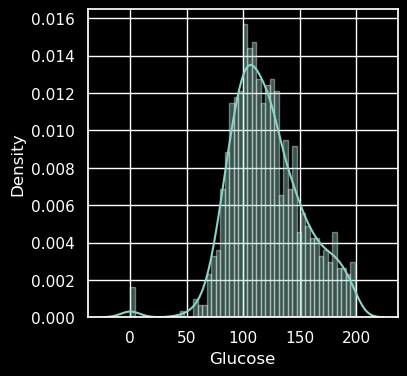

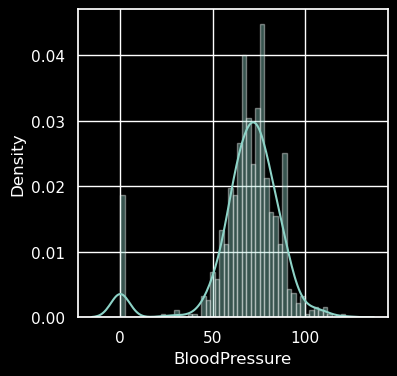

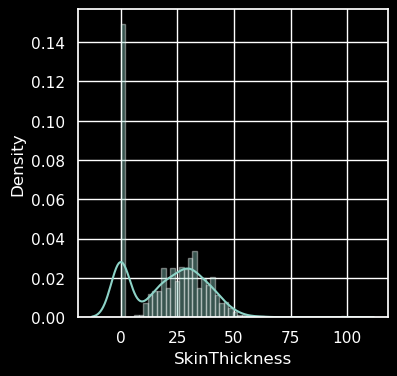

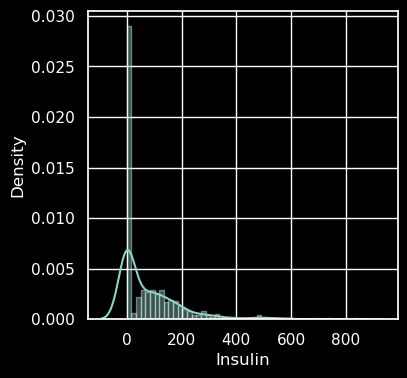

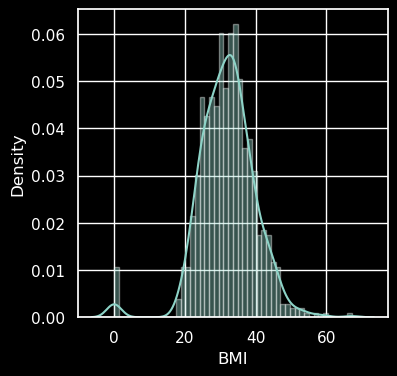

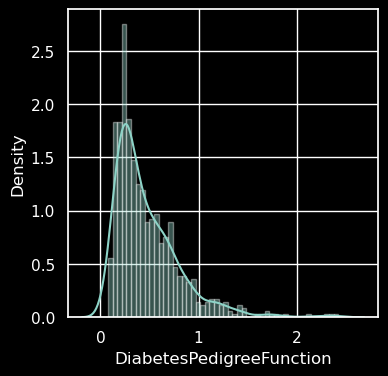

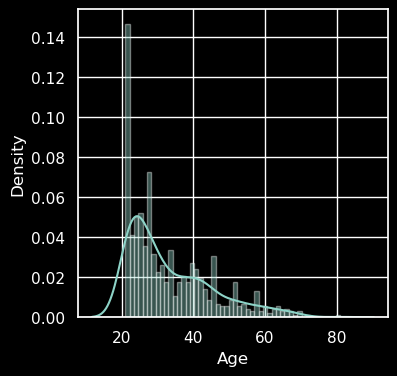

In [13]:
def distplots(df,col):
    plt.style.use('dark_background')
    plt.figure(figsize = (4,4))
    sns.distplot(df[col], bins=50,kde=True,)
    plt.show()


for col in list(df.iloc[:,:-1]):
    distplots(df,col)

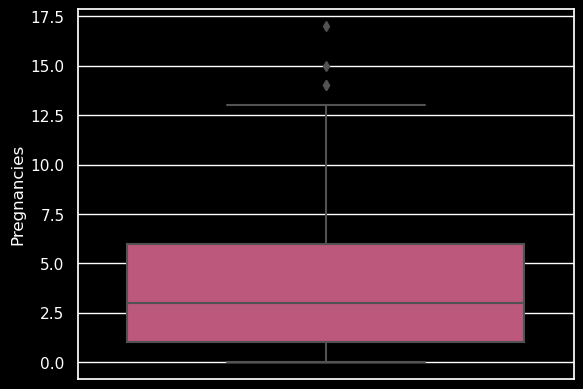

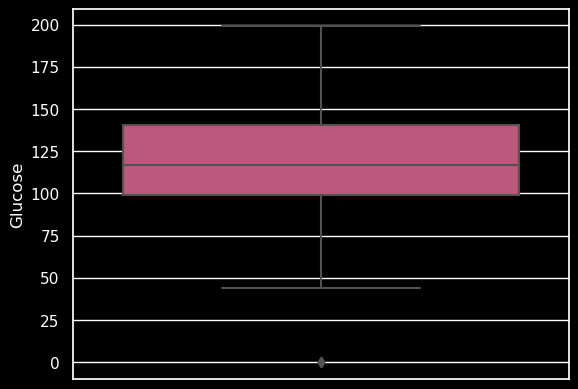

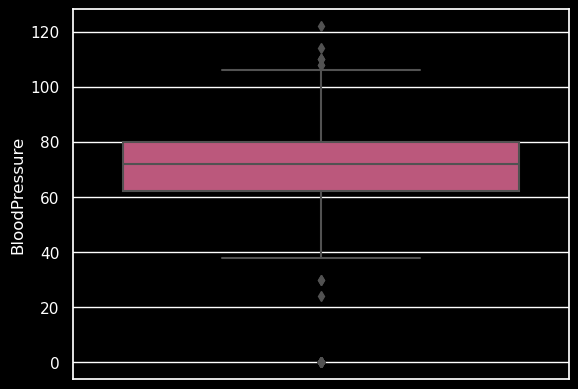

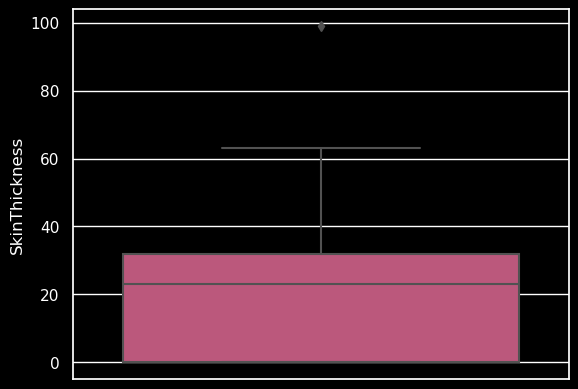

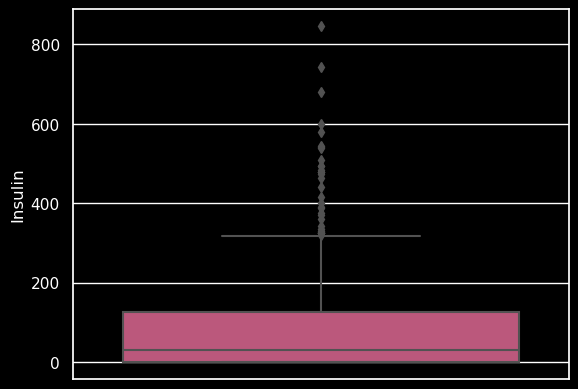

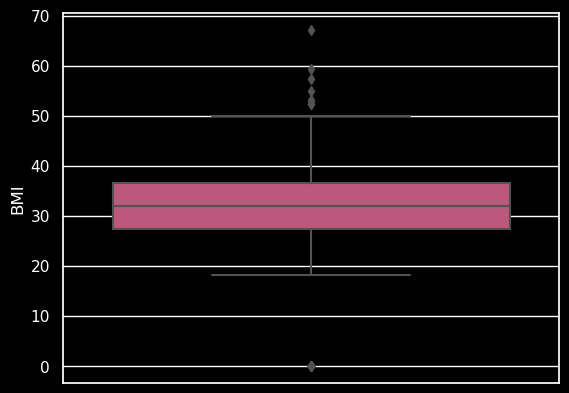

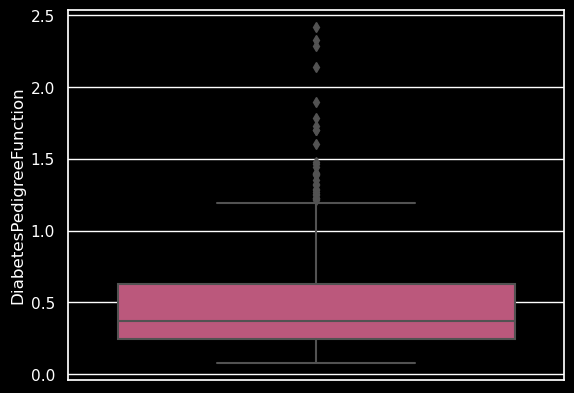

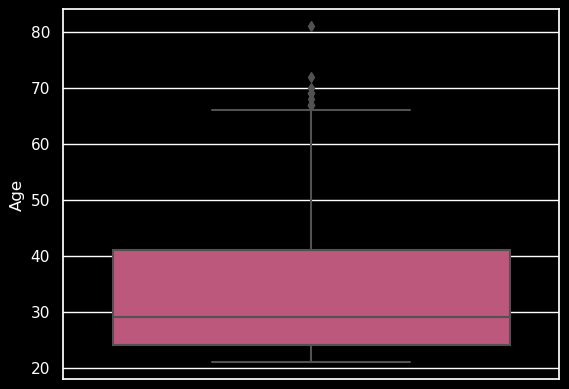

In [14]:
def boxplots_univariate(df,col):
    plt.style.use('dark_background')
    
    sns.boxplot(y = col, data = df, palette ='plasma' )
    plt.show()

for col in list(df.iloc[:,:-1]):
        boxplots_univariate(df,col)

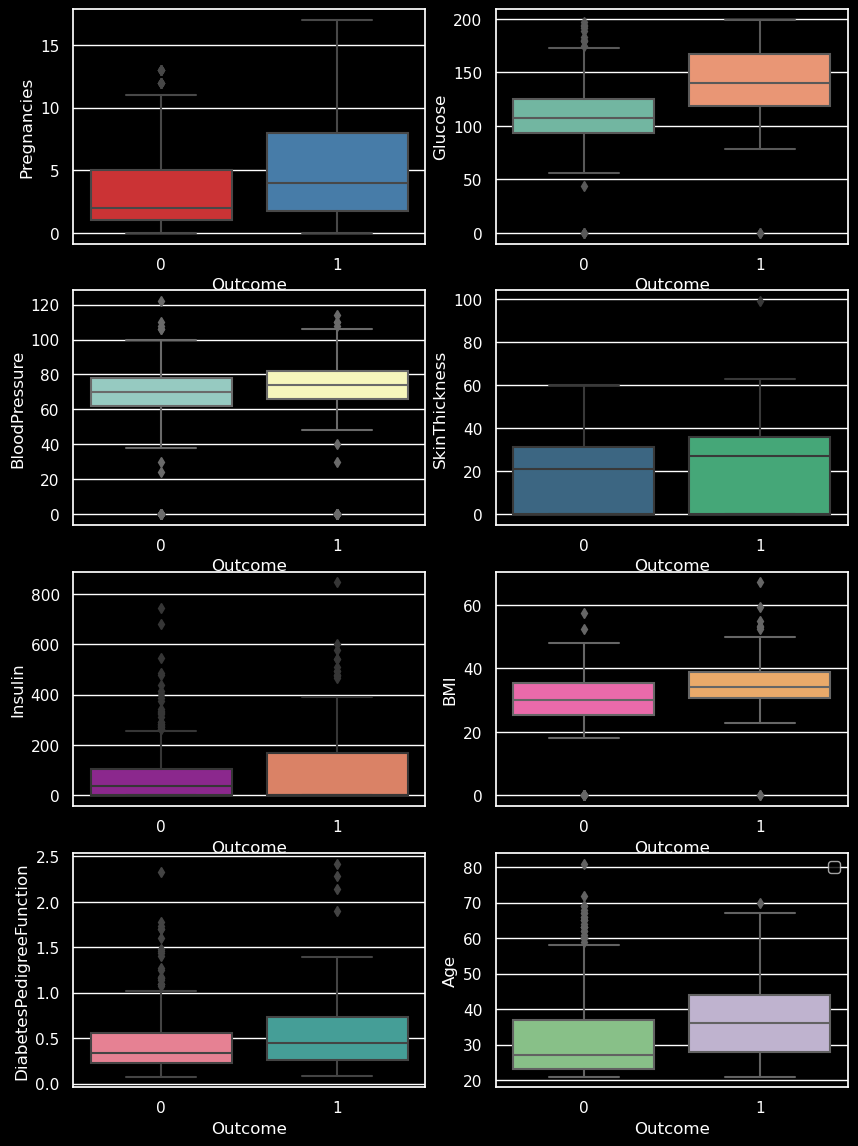

In [15]:


fig, axes = plt.subplots(4, 2, figsize=(10, 14))

sns.boxplot(x="Outcome", y='Pregnancies', data=df, palette='Set1',ax=axes[0, 0],)
sns.boxplot(x="Outcome", y='Glucose', data=df, palette='Set2',ax=axes[0, 1],)
sns.boxplot(x="Outcome", y='BloodPressure', data=df, palette='Set3',ax=axes[1, 0],)
sns.boxplot(x="Outcome", y='SkinThickness', data=df, palette='viridis',ax=axes[1, 1],)
sns.boxplot(x="Outcome", y='Insulin', data=df, palette='plasma',ax=axes[2, 0],)
sns.boxplot(x="Outcome", y='BMI', data=df, palette='spring',ax=axes[2, 1],)
sns.boxplot(x="Outcome", y='DiabetesPedigreeFunction', data=df, palette='husl',ax=axes[3, 0],)
sns.boxplot(x="Outcome", y='Age', data=df, palette='Accent',ax=axes[3,1],)
plt.legend()

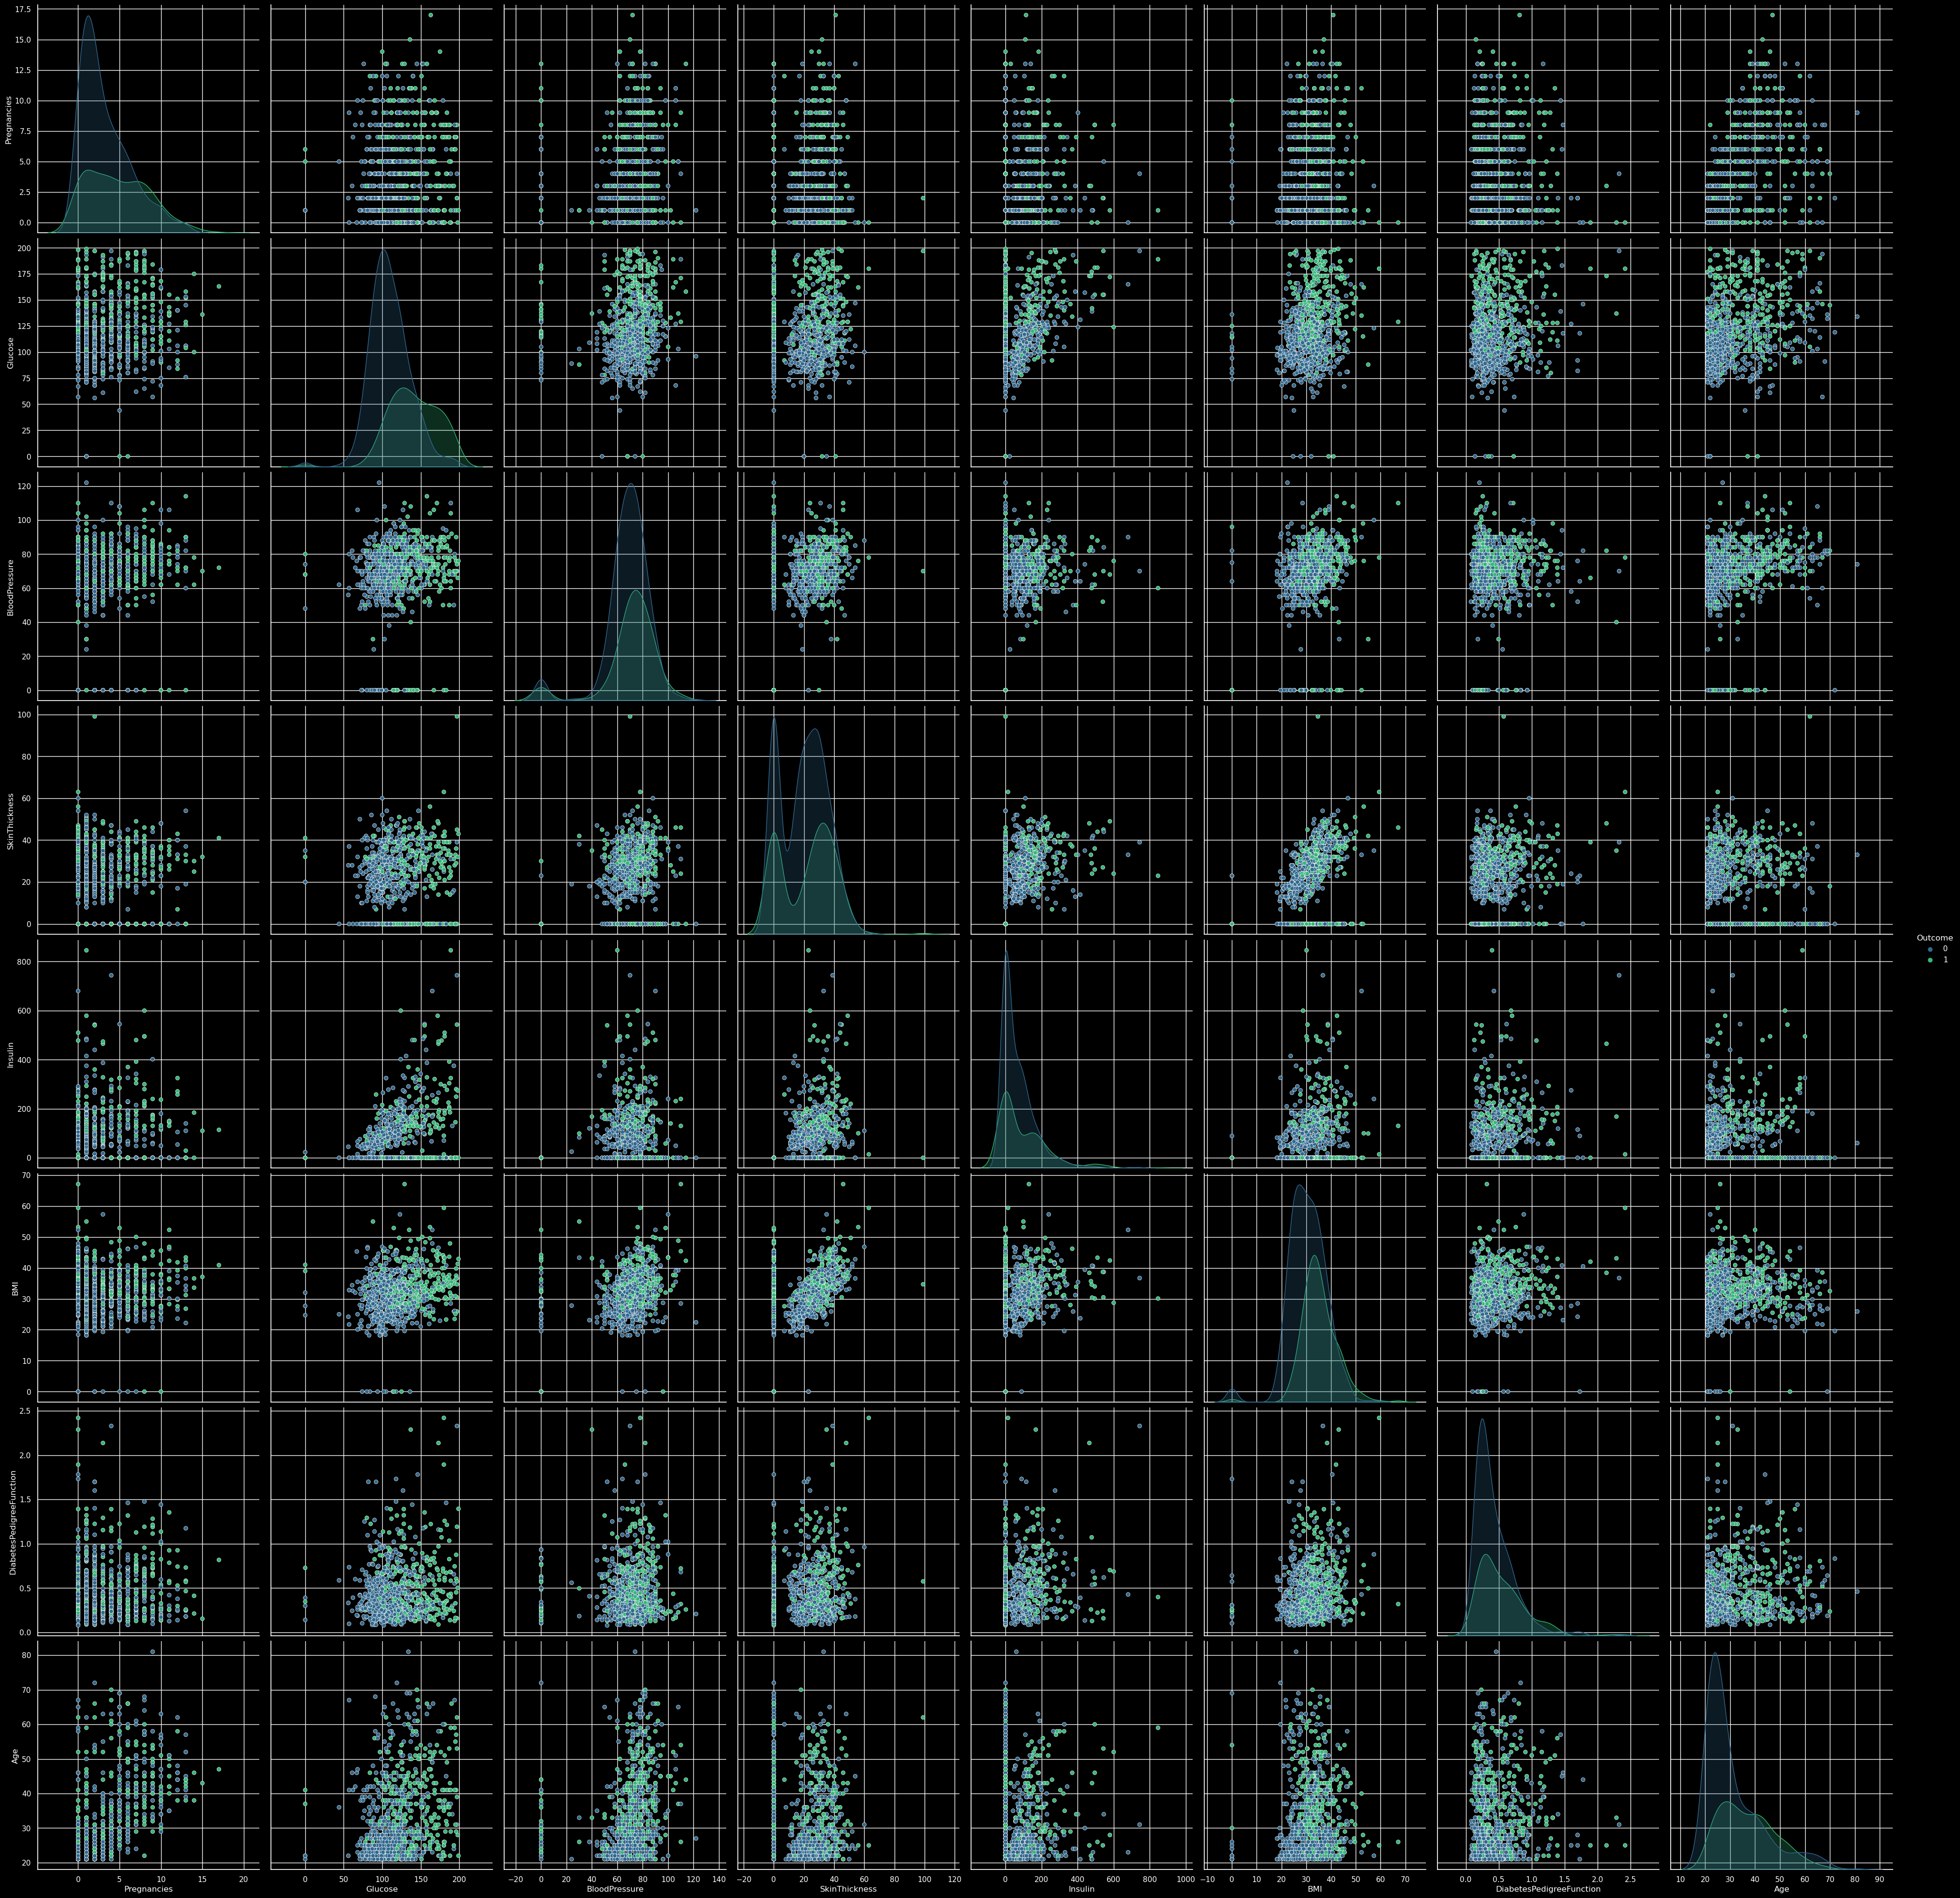

In [16]:
plt.style.use('dark_background')
sns.pairplot(df, size = 5, hue='Outcome', kind = 'scatter',palette ='viridis') 
plt.show()

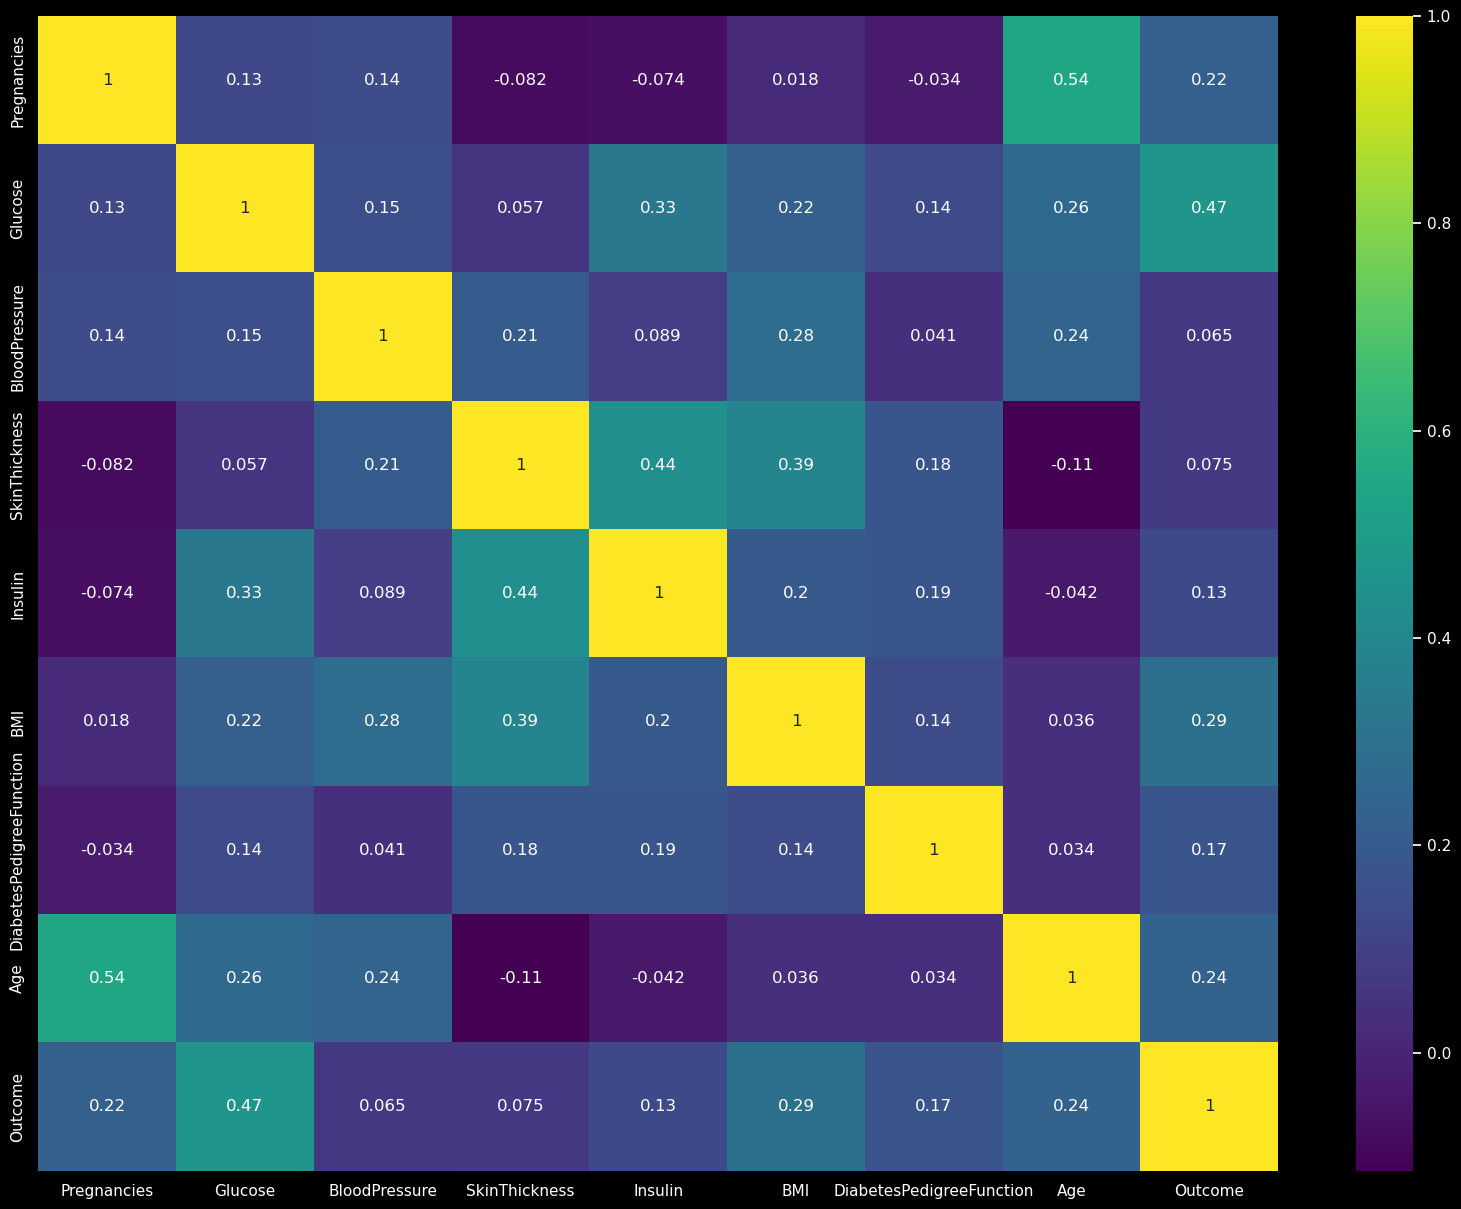

In [17]:
# Finding correlation
plt.style.use('dark_background')
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [18]:
target = "Outcome"
x = df.drop(columns=target)
y = df[target]

# **Spliting into Train and Test**

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)
print('x_train :', x_train.shape,'\nx_test  :', x_test.shape, 
      '\ny_train :', y_train.shape,'\ny_test  :', y_test.shape)

x_train : (576, 8) 
x_test  : (192, 8) 
y_train : (576,) 
y_test  : (192,)


# **Logistic Regression Model**

In [20]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

# **Predict Data and Evaluation of Model (Without feature selection)**

In [21]:
y_pred_train = logit.predict(x_train)
Train_acc = accuracy_score(y_train, y_pred_train)

y_pred_test  = logit.predict(x_test)
Test_acc = accuracy_score(y_test, y_pred_test)

print('=='*35)
print(' '*15,'Without Feature scaling')
print('=='*35)
print("Trainging Accuracy Score :", Train_acc,)

print("Test Accuracy Score      :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, y_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, y_pred_test))
print('=='*35)
print( 'confusion_matrix_Train :','\n','\n',confusion_matrix(y_train, y_pred_train))
print("=="*35)
print('confusion_matrix_Test   :','\n','\n',confusion_matrix(y_test, y_pred_test))

                Without Feature scaling
Trainging Accuracy Score : 0.7725694444444444
Test Accuracy Score      : 0.796875

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       381
           1       0.72      0.54      0.62       195

    accuracy                           0.77       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       119
           1       0.79      0.63      0.70        73

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192

confusion_matrix_Train : 
 
 [[340  41]
 [ 90 105]]
confusion_matrix_Test   : 
 
 [[107  12]
 [ 27  46]]


In [22]:
#StandardScaler in dataframe
sc = StandardScaler()
sc_x = pd.DataFrame(sc.fit_transform(x) , columns=x.columns)
sc_x.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

# **Predict Data and Evaluation of Model (With feature selection)**

In [23]:
x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size=0.25,random_state=123)
logit.fit(x_train,y_train)
y_pred_train = logit.predict(x_train)
Train_acc = accuracy_score(y_train, y_pred_train)

y_pred_test  = logit.predict(x_test)
Test_acc = accuracy_score(y_test, y_pred_test)
print('=='*35)
print("Trainging Accuracy Score :", Train_acc,)

print("Test Accuracy Score      :", Test_acc)
print()
print('=='*35)
print( ' '*15,'Classification_report_Train',)
print('=='*35)
print( classification_report(y_train, y_pred_train))
print('=='*35)
print( ' '*15,'Classification_report_Test',)
print('=='*35)
print(classification_report(y_test, y_pred_test))
print('=='*35)
print( 'confusion_matrix_Train :','\n','\n',confusion_matrix(y_train, y_pred_train))
print("=="*35)
print('confusion_matrix_Test   :','\n','\n',confusion_matrix(y_test, y_pred_test))


Trainging Accuracy Score : 0.7760416666666666
Test Accuracy Score      : 0.796875

                Classification_report_Train
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       381
           1       0.73      0.54      0.62       195

    accuracy                           0.78       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.78      0.77       576

                Classification_report_Test
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       119
           1       0.79      0.63      0.70        73

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192

confusion_matrix_Train : 
 
 [[342  39]
 [ 90 105]]
confusion_matrix_Test   : 
 
 [[107  12]
 [ 27  46]]
